In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
145,15746422,Female,24,89000,0
143,15783029,Male,30,89000,0
45,15639277,Male,23,20000,0
238,15617877,Female,46,82000,0
287,15761950,Female,48,138000,1


In [3]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [6]:
def accuracy(Y_true, Y_pred):
    true_sum = np.sum(Y_true == Y_pred)
    n = len(Y_true)
    return true_sum / n

def get_precision_and_recall(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    precision = cm[0][0] / (cm[0][0] + cm[0][1])
    recall = cm[0][0] / (cm[0][0] + cm[1][0])
    return precision, recall

def get_f1_score(Y_test, Y_pred):
    p, r = get_precision_and_recall(Y_test, Y_pred)
    F1 = 2 * (p*r)/(p+r)
    return F1

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc = accuracy(Y_test, Y_pred)
print(f"Model accuracy is: {acc*100:.2f}%")
pre, rec = get_precision_and_recall(Y_test, Y_pred)
print(f"Model P and R is: {pre} {rec}")
F1_score = get_f1_score(Y_test, Y_pred)
print(f"Model F1 score is: {F1_score}")

Model accuracy is: 89.00%
Model P and R is: 0.9558823529411765 0.8904109589041096
Model F1 score is: 0.9219858156028369


In [7]:
Y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
classes_counts = Y.value_counts()
classes_counts / np.sum(classes_counts) * 100

0    64.25
1    35.75
Name: Purchased, dtype: float64

In [9]:
def dump_model(x_vector):
    return False

Y_pred_1 = np.array([dump_model(x) for x in X_test])
print(Y_pred_1.shape, X.shape)
acc = accuracy(Y_test, Y_pred_1)
pre, rec = get_precision_and_recall(Y_test, Y_pred_1)
F1_score = get_f1_score(Y_test, Y_pred)
print(f"Model accuracy is: {acc*100:.2f}%")
print(f"Model P and R is: {pre} {rec}")
print(f"Model F1 score is: {F1_score}")

(100,) (400, 2)
Model accuracy is: 68.00%
Model P and R is: 1.0 0.68
Model F1 score is: 0.9219858156028369


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


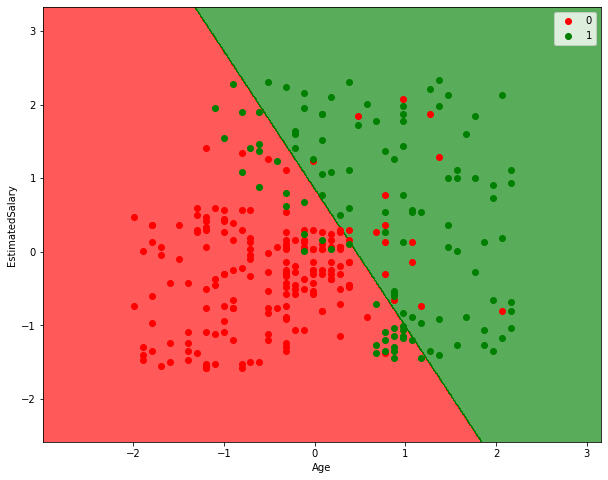

In [10]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 8))
X_set, Y_set = X_train, Y_train

X1, X2, = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop = X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop = X_set[:, 1].max()+1, step=0.01)
)

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.65, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], 
                X_set[Y_set== j, 1],
                c = ListedColormap(('red', 'green'))(i),
                label=j)
    
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


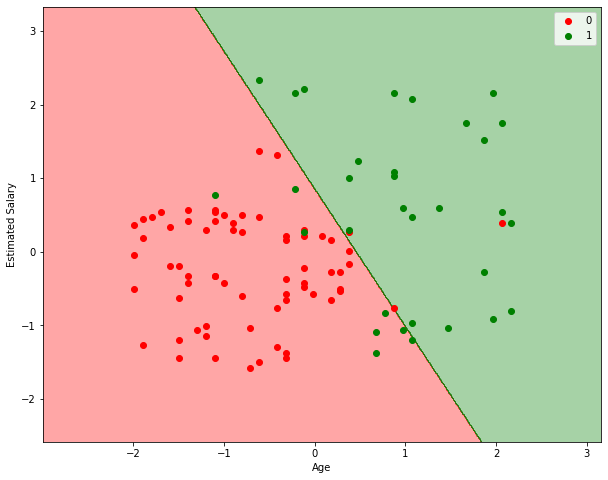

In [11]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 8))
X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop = X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop = X_set[:, 1].max()+1, step=0.01)
)
plt.contourf(
    X1, X2, model.predict(
        np.array([X1.ravel(), X2.ravel()]).T
    ).reshape(X1.shape), 
    alpha=0.35, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], 
                X_set[Y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), 
                label=j)

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()